In [0]:
%matplotlib inline

In [0]:
import os

In [4]:
!unzip -f HST_UVIS_Pipeline-master.zip

Archive:  HST_UVIS_Pipeline-master.zip
c9fe58198ef98d7a3d8f4fa278bb42586e471516
replace HST_UVIS_Pipeline-master/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: HST_UVIS_Pipeline-master/.gitignore  
  inflating: HST_UVIS_Pipeline-master/HSTUVISTimeSeries.py  
  inflating: HST_UVIS_Pipeline-master/LICENSE  
  inflating: HST_UVIS_Pipeline-master/README.md  
  inflating: HST_UVIS_Pipeline-master/compare_new_and_old_wasp43_uvis_photometry.py  
  inflating: HST_UVIS_Pipeline-master/download_file_from_google_drive.py  
  inflating: HST_UVIS_Pipeline-master/draw_apertures.py  
  inflating: HST_UVIS_Pipeline-master/notebooks/dfm_exoplanet_transit_tutorial.ipynb  
  inflating: HST_UVIS_Pipeline-master/notebooks/wasp43_dfm_exoplanet_transit_tutorial.ipynb  
  inflating: HST_UVIS_Pipeline-master/plot_aperture_edges_with_and_without_theta.py  
  inflating: HST_UVIS_Pipeline-master/plot_xcenter_ycenter_scatter.py  
  inflating: HST_UVIS_Pipeline-master/plotting.py  
  inflating: HS

In [0]:
os.chdir('/content/HST_UVIS_Pipeline-master')

In [0]:
!python download_file_from_google_drive.py

In [0]:
!mv wasp43_savedict_206ppm_100x100_finescale.joblib.save WASP43_savedict.joblib.save

In [8]:
os.chdir('/content')
!git clone https://github.com/dfm/exoplanet

fatal: destination path 'exoplanet' already exists and is not an empty directory.


In [0]:
os.chdir('/content/exoplanet')

In [10]:
!pip install corner
!pip install photutils

In [11]:
!pip install -r requirements.txt

In [12]:
!pip install git+https://github.com/dfm/exoplanet

  Cloning https://github.com/dfm/exoplanet to /tmp/pip-req-build-4864fmjb
  Running command git clone -q https://github.com/dfm/exoplanet /tmp/pip-req-build-4864fmjb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for exoplanet: filename=exoplanet-0.2.2.dev38+g271a5ba-cp36-none-any.whl size=1704725 sha256=5f080aea4baaef9b8a7d40f88502ab559f454380b2af5db155d67ff729ad654b
  Stored in directory: /tmp/pip-ephem-wheel-cache-05p458z0/wheels/61/21/2d/22094e4168f84ffa10e3d8dd55f5d3610899711530a5fe1216
Successfully built exoplanet


# Move to notebooks directory and run setup

In [0]:
os.chdir('/content/exoplanet/docs/notebooks')

In [0]:
%run notebook_setup

# Load data in from Google Drive

from google.colab import drive
drive.mount('/content/drive')

# START TIME TESTING RUN THROUGH

In [0]:
# from time import time

# start0 = time()
# import numpy as np
# import matplotlib.pyplot as plt
# import multiprocessing as mp
# import exoplanet as xo

# start1 = time()
# # The light curve calculation requires an orbit
# orbit = xo.orbits.KeplerianOrbit(period=3.456)

# # Compute a limb-darkened light curve using starry
# t = np.linspace(-0.1, 0.1, 1000)
# u = [0.3, 0.2]
# light_curve = (
#     xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=0.1, t=t, texp=0.02).eval()
# )
# # Note: the `eval` is needed because this is using Theano in
# # the background
# time1 = time() - start1

# start2 = time()
# np.random.seed(123)
# periods = np.random.uniform(5, 20, 2)
# t0s = periods * np.random.rand(2)
# t = np.arange(0, 80, 0.02)
# yerr = 5e-4

# import pymc3 as pm

# with pm.Model() as model:

#     # The baseline flux
#     mean = pm.Normal("mean", mu=0.0, sd=1.0)

#     # The time of a reference transit for each planet
#     t0 = pm.Normal("t0", mu=t0s, sd=1.0, shape=2)

#     # The log period; also tracking the period itself
#     logP = pm.Normal("logP", mu=np.log(periods), sd=0.1, shape=2)
#     period = pm.Deterministic("period", pm.math.exp(logP))

#     # The Kipping (2013) parameterization for quadratic limb darkening paramters
#     u = xo.distributions.QuadLimbDark("u", testval=np.array([0.3, 0.2]))

#     r = pm.Uniform("r", lower=0.01, upper=0.1, shape=2, testval=np.array([0.04, 0.06]))
#     b = xo.distributions.ImpactParameter("b", ror=r, shape=2, testval=np.random.rand(2))

#     # Set up a Keplerian orbit for the planets
#     orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)

#     # Compute the model light curve using starry
#     light_curves = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=r, t=t)
#     light_curve = pm.math.sum(light_curves, axis=-1) + mean

#     # Here we track the value of the model light curve for plotting
#     # purposes
#     pm.Deterministic("light_curves", light_curves)

#     # In this line, we simulate the dataset that we will fit
#     y = xo.eval_in_model(light_curve)
#     y += yerr * np.random.randn(len(y))

#     # The likelihood function assuming known Gaussian uncertainty
#     pm.Normal("obs", mu=light_curve, sd=yerr, observed=y)

#     # Fit for the maximum a posteriori parameters given the simuated
#     # dataset
#     map_soln = xo.optimize(start=model.test_point)

# time2 = time() - start2
# start3 = time()
# np.random.seed(42)
# with model: 
#     trace = pm.sample(
#         tune=3000,
#         draws=3000,
#         start=map_soln,
#         chains=mp.cpu_count(),
#         step=xo.get_dense_nuts_step(target_accept=0.9),
#         cores=mp.cpu_count()
#     )

# time3 = time() - start3
# time0 = time() - start0
# print(f'time1 took {time1} seconds')
# print(f'time2 took {time2} seconds')
# print(f'time3 took {time3} seconds')
# print(f'full operation [time0] took {time0} seconds')

optimizing logp for variables: [b, r, u, logP, t0, mean]
59it [00:00, 85.66it/s, logp=2.479354e+04] 
message: Desired error not necessarily achieved due to precision loss.
logp: 24787.977771807487 -> 24793.539425611194
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, r, u, logP, t0, mean]
Sampling 4 chains: 100%|██████████| 24000/24000 [02:33<00:00, 156.78draws/s]


time1 took 0.4654541015625 seconds
time2 took 5.717775821685791 seconds
time3 took 162.8261866569519 seconds
full operation [time0] took 169.00955271720886 seconds


# END TIME TESTING RUN THROUGH

# Transit fitting

*exoplanet* includes methods for computing the light curves transiting planets.
In its simplest form this can be used to evaluate a light curve like you would do with [batman](https://astro.uchicago.edu/~kreidberg/batman/), for example:

In [0]:
os.chdir('/content/HST_UVIS_Pipeline-master')

In [0]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import exoplanet as xo

from HSTUVISTimeSeries import HSTUVISTimeSeries, info_message

In [25]:
ls

exoplanet/                 HST_UVIS_Pipeline-master.zip
HST_UVIS_Pipeline-master/  sample_data/


In [0]:
def instantiate_wasp43(planet_name, data_dir, working_dir, file_type):
    wasp43 = HSTUVISTimeSeries(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        wasp43.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        wasp43.load_data()

    return wasp43

def create_raw_lc_stddev(wasp43):
    ppm = 1e6
    phot_vals = wasp43.photometry_df
    lc_std_rev = phot_vals.iloc[wasp43.idx_rev].std(axis=0)
    lc_std_fwd = phot_vals.iloc[wasp43.idx_fwd].std(axis=0)

    lc_med_rev = np.median(phot_vals.iloc[wasp43.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[wasp43.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [0]:
# from argparse import ArgumentParser

# parser = ArgumentParser()

# parser.add_argument('--planet_name', type=str, default=None)
# parser.add_argument('--file_type', type=str, default='flt.fits')
# parser.add_argument('--save_now', action='store_true')
# parser.add_argument('--fit_model_flag', action='store_true')
# parser.add_argument('--plot_verbose', action='store_true')

# clargs = parser.parse_args()

plot_verbose = False
save_now = False
planet_name = 'WASP43'
file_type = 'flt.fits'

HOME = os.environ['HOME']
base_dir = os.path.join(HOME, 'Research', 'Planets', 'WASP43')
data_dir = os.path.join(base_dir, 'data', 'UVIS', 'MAST_2019-07-03T0738')
data_dir = os.path.join(data_dir, 'HST', 'FLTs')
working_dir = os.path.join(base_dir, 'github_analysis', 'savefiles')

In [38]:
wasp43 = instantiate_wasp43(planet_name, data_dir, working_dir, file_type)

0it [00:00, ?it/s]
0it [00:00, ?it/s]

[INFO] Initializing Instance of the `HSTUVISTimeSeries` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files
[INFO] Creating New Flux/Error/Time Attributes


IndexError: ignored

In [0]:
data_df = pd.read_csv('/content/drive/My Drive/WASP43/analysis/WASP43_draft_photometry.csv')
data_df.sort_values(by=['times'], inplace=True)
data_df = data_df.reset_index()
data_df.drop(['index'], axis=1, inplace=True)

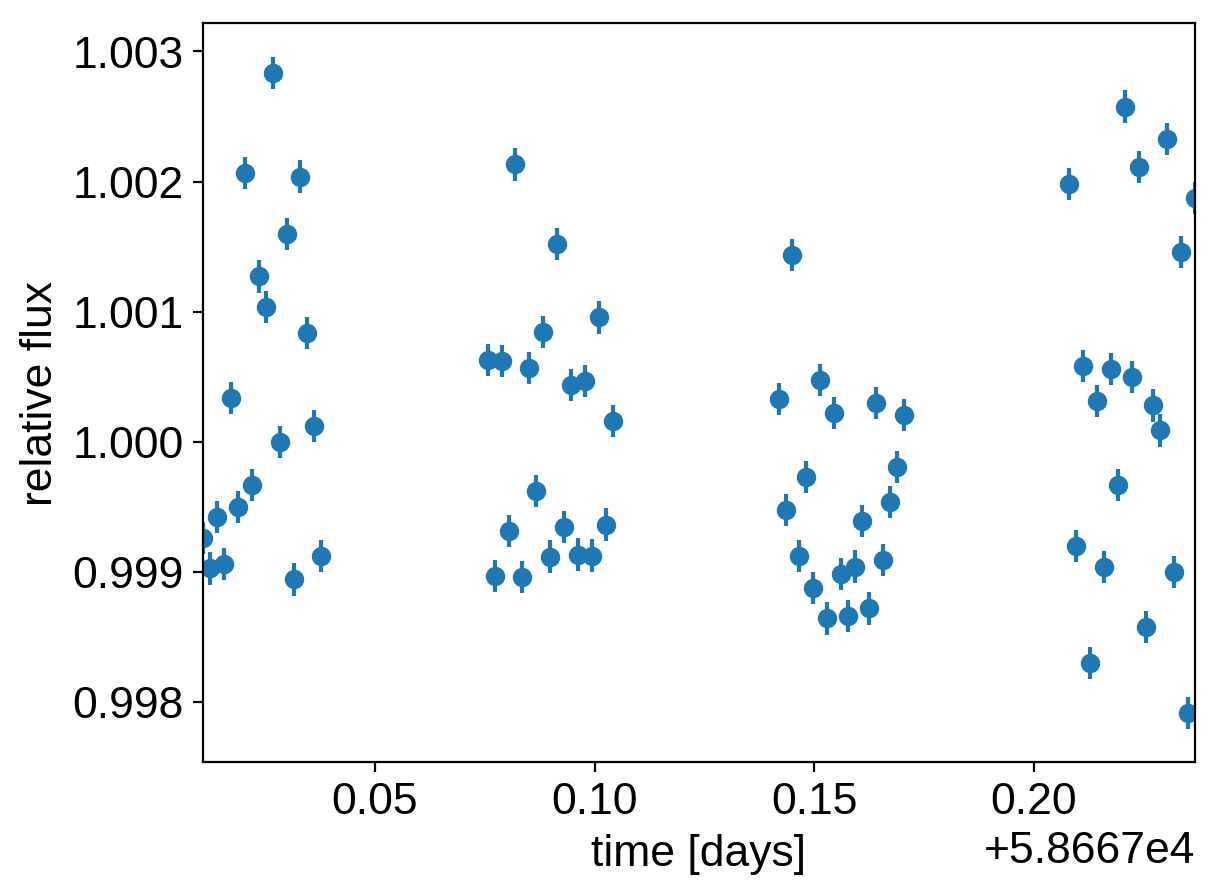

In [0]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t, flux, yerr, fmt='o', color="C0")
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

But the real power comes from the fact that this is defined as a [Theano operation](http://deeplearning.net/software/theano/extending/extending_theano.html) so it can be combined with PyMC3 to do transit inference using Hamiltonian Monte Carlo.

## The transit model in PyMC3

In this section, we will construct a simple transit fit model using *PyMC3* and then we will fit a two planet model to simulated data.
To start, let's randomly sample some periods and phases and then define the time sampling:

In [0]:
np.random.seed(42)

time_med = np.median(t)
med_t_diff = np.median(np.diff(t))

Then, define the parameters.
In this simple model, we'll just fit for the limb darkening parameters of the star, and the period, phase, impact parameter, and radius ratio of the planets (note: this is already 10 parameters and running MCMC to convergence using [emcee](https://emcee.readthedocs.io) would probably take at least an hour).
For the limb darkening, we'll use a quadratic law as parameterized by [Kipping (2013)](https://arxiv.org/abs/1308.0009).
This reparameterizations is implemented in *exoplanet* as custom *PyMC3* distribution :class:`exoplanet.distributions.QuadLimbDark`.

In [0]:
from multiprocessing import cpu_count
print(f'This instance has {cpu_count()} CPUs')

This instance has 4 CPUs


In [0]:
import pymc3 as pm
b = 0.66 # Hellier 2011
period = 0.813475  # days # exo.mast.stsci.edu
u = [0]
t0 = time_med
edepth = np.sqrt(500/1e6)

orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)
light_curves = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=edepth, t=t).eval().flatten()

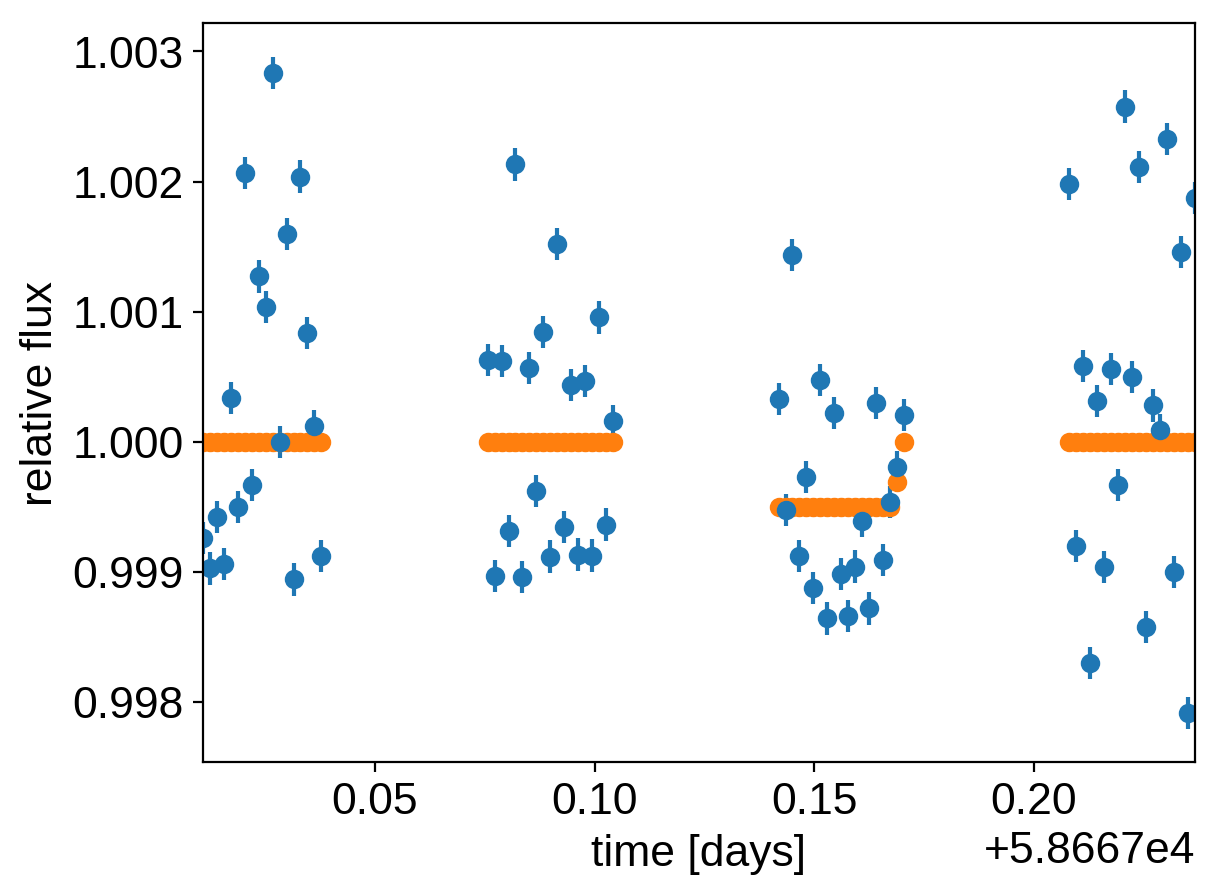

In [0]:
plt.errorbar(t, flux, yerr, fmt='o')
plt.plot(t, light_curves+1,'o')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [0]:
t0_wasp43 = 55528.3684  # exo.mast.stsci.edu
n_epochs = np.int(np.round(((time_med - t0_wasp43) / period)-0.5))
n_epochs, ((time_med - t0_wasp43) / period)
t0_guess = t0_wasp43 + (n_epochs+0.5) * period

# t0s = np.random.normal(t0_guess, 0.1*med_t_diff, size=2)
t0s = t0_guess

In [0]:
import pymc3 as pm
b = 0.66 # Hellier 2011
period = 0.813475  # days # exo.mast.stsci.edu
u = [0]

oot_guess = np.median(np.r_[flux[:2*18], flux[-18:]])
stellar_variance = np.std(np.r_[flux[:2*18], flux[-18:]])
data = flux - oot_guess

with pm.Model() as model:

    # The baseline flux
    mean = pm.Normal("mean", mu=0.0, sd=1.0)

    # The time of a reference transit for each planet
    t0 = pm.Normal("t0", mu=t0_guess, sd=1e-6)  # , shape=2)

    # The log period; also tracking the period itself
    # logP = pm.Normal("logP", mu=np.log(periods), sd=0.1, shape=2)
    # period = pm.Deterministic("period", pm.math.exp(logP))

    # The Kipping (2013) parameterization for quadratic limb darkening paramters
    # u = xo.distributions.QuadLimbDark("u", testval=np.array([0.3, 0.2]))

    edepth = pm.Uniform("edepth", lower=1e-6, upper=0.1)  # , shape=2)  #, testval=np.array([0.04, 0.06]))
    edepth = np.sqrt(edepth)
    # b = xo.distributions.ImpactParameter("b", ror=r, shape=2, testval=np.random.rand(2))

    slope = pm.Uniform("slope", lower=-0.1, upper=0.1)
    # intercept = pm.Uniform("intercept", lower=-0.1, upper=0.1)
    line = slope * (t-t0_guess) + mean

    # Set up a Keplerian orbit for the planets
    orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0s, b=b)

    # # Compute the model light curve using starry
    light_curves = xo.LimbDarkLightCurve(u).get_light_curve(orbit=orbit, r=edepth, t=t) # this crashes?
    light_curve = pm.math.sum(light_curves, axis=-1) 

    # # Here we track the value of the model light curve for plotting
    # # purposes
    pm.Deterministic("light_curves", light_curves)

    # # In this line, we simulate the dataset that we will fit
    # # y = xo.eval_in_model(light_curve)
    # # y += yerr * np.random.randn(len(y))

    # # The likelihood function assuming known Gaussian uncertainty
    pm.Normal("obs", mu=light_curve + line, sd=yerr, observed=data)

    # # Fit for the maximum a posteriori parameters given the simuated dataset
    map_soln = xo.optimize(start=model.test_point)

optimizing logp for variables: [slope, edepth, t0, mean]
39it [00:01, 34.81it/s, logp=-2.286083e+03] 
message: Desired error not necessarily achieved due to precision loss.
logp: -1468754.410603316 -> -2286.0832199858387


Now we can plot the simulated data and the maximum a posteriori model to make sure that our initialization looks ok.

In [0]:
print(f"Found an eclipse of size {map_soln['edepth']*1e6:.0f} ppm at {map_soln['edepth']*86400:.2f} seconds from expected")

Found an eclipse of size 681 ppm at 58.84 seconds from expected


In [0]:
np.where(map_soln["light_curves"] < 0)[0]

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55])

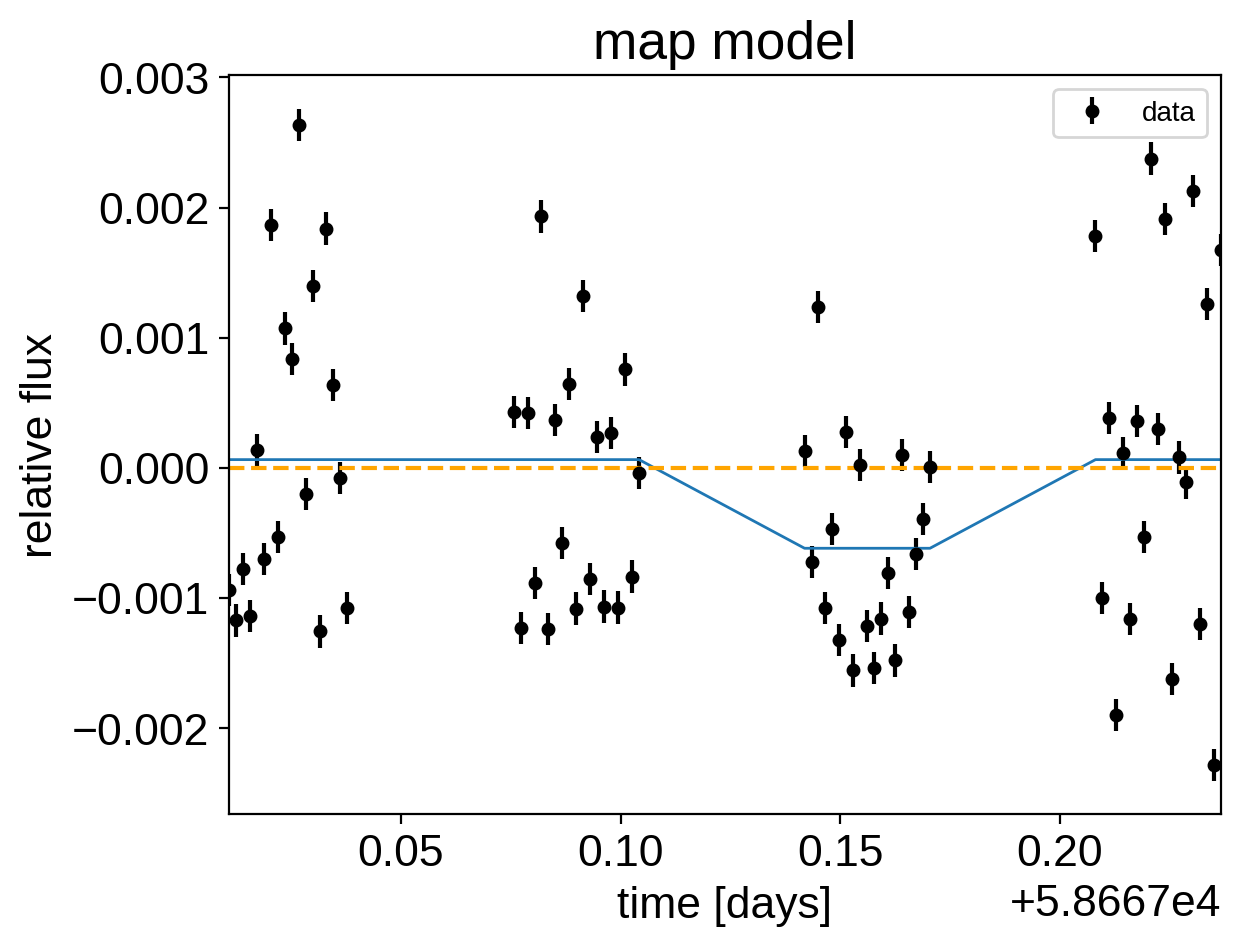

In [0]:
plt.errorbar(t, data, yerr, color="k", fmt='o', ms=4, label="data")
plt.plot(t, map_soln["light_curves"] + map_soln['mean'], lw=1)
plt.axhline(0.0, ls='--', color='orange')
plt.xlim(t.min(), t.max())
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.legend(fontsize=10)
plt.title("map model");

## Sampling

Now, let's sample from the posterior defined by this model.
As usual, there are strong covariances between some of the parameters so we'll use :func:`exoplanet.get_dense_nuts_step`.

In [0]:
np.random.seed(42)
with model:
    trace = pm.sample(
        tune=3000,
        draws=3000,
        start=map_soln,
        chains=4,
        step=xo.get_dense_nuts_step(target_accept=0.9),
        cores=mp.cpu_count()
    )a

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, r, u, logP, t0, mean]
Sampling 4 chains: 100%|██████████| 24000/24000 [02:29<00:00, 160.92draws/s]


After sampling, it's important that we assess convergence.
We can do that using the `pymc3.summary` function:

In [0]:
pm.summary(trace, varnames=["t0", "edepth", "mean", "slope"])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
t0,58667.161688,9.962173e-07,9.044939e-09,58667.161685,58667.161689,11965.944593,1.000049
edepth,0.000680,3.383689e-05,3.184009e-07,0.000613,0.000746,11653.319483,1.000034
mean,0.000063,1.923334e-05,1.633259e-07,0.000026,0.000100,12047.613448,0.999857
slope,0.000365,1.979639e-04,1.642531e-06,-0.000022,0.000746,12371.041796,0.999924


That looks pretty good!
Fitting this without *exoplanet* would have taken a lot more patience.

Now we can also look at the [corner plot](https://corner.readthedocs.io) of some of that parameters of interest:

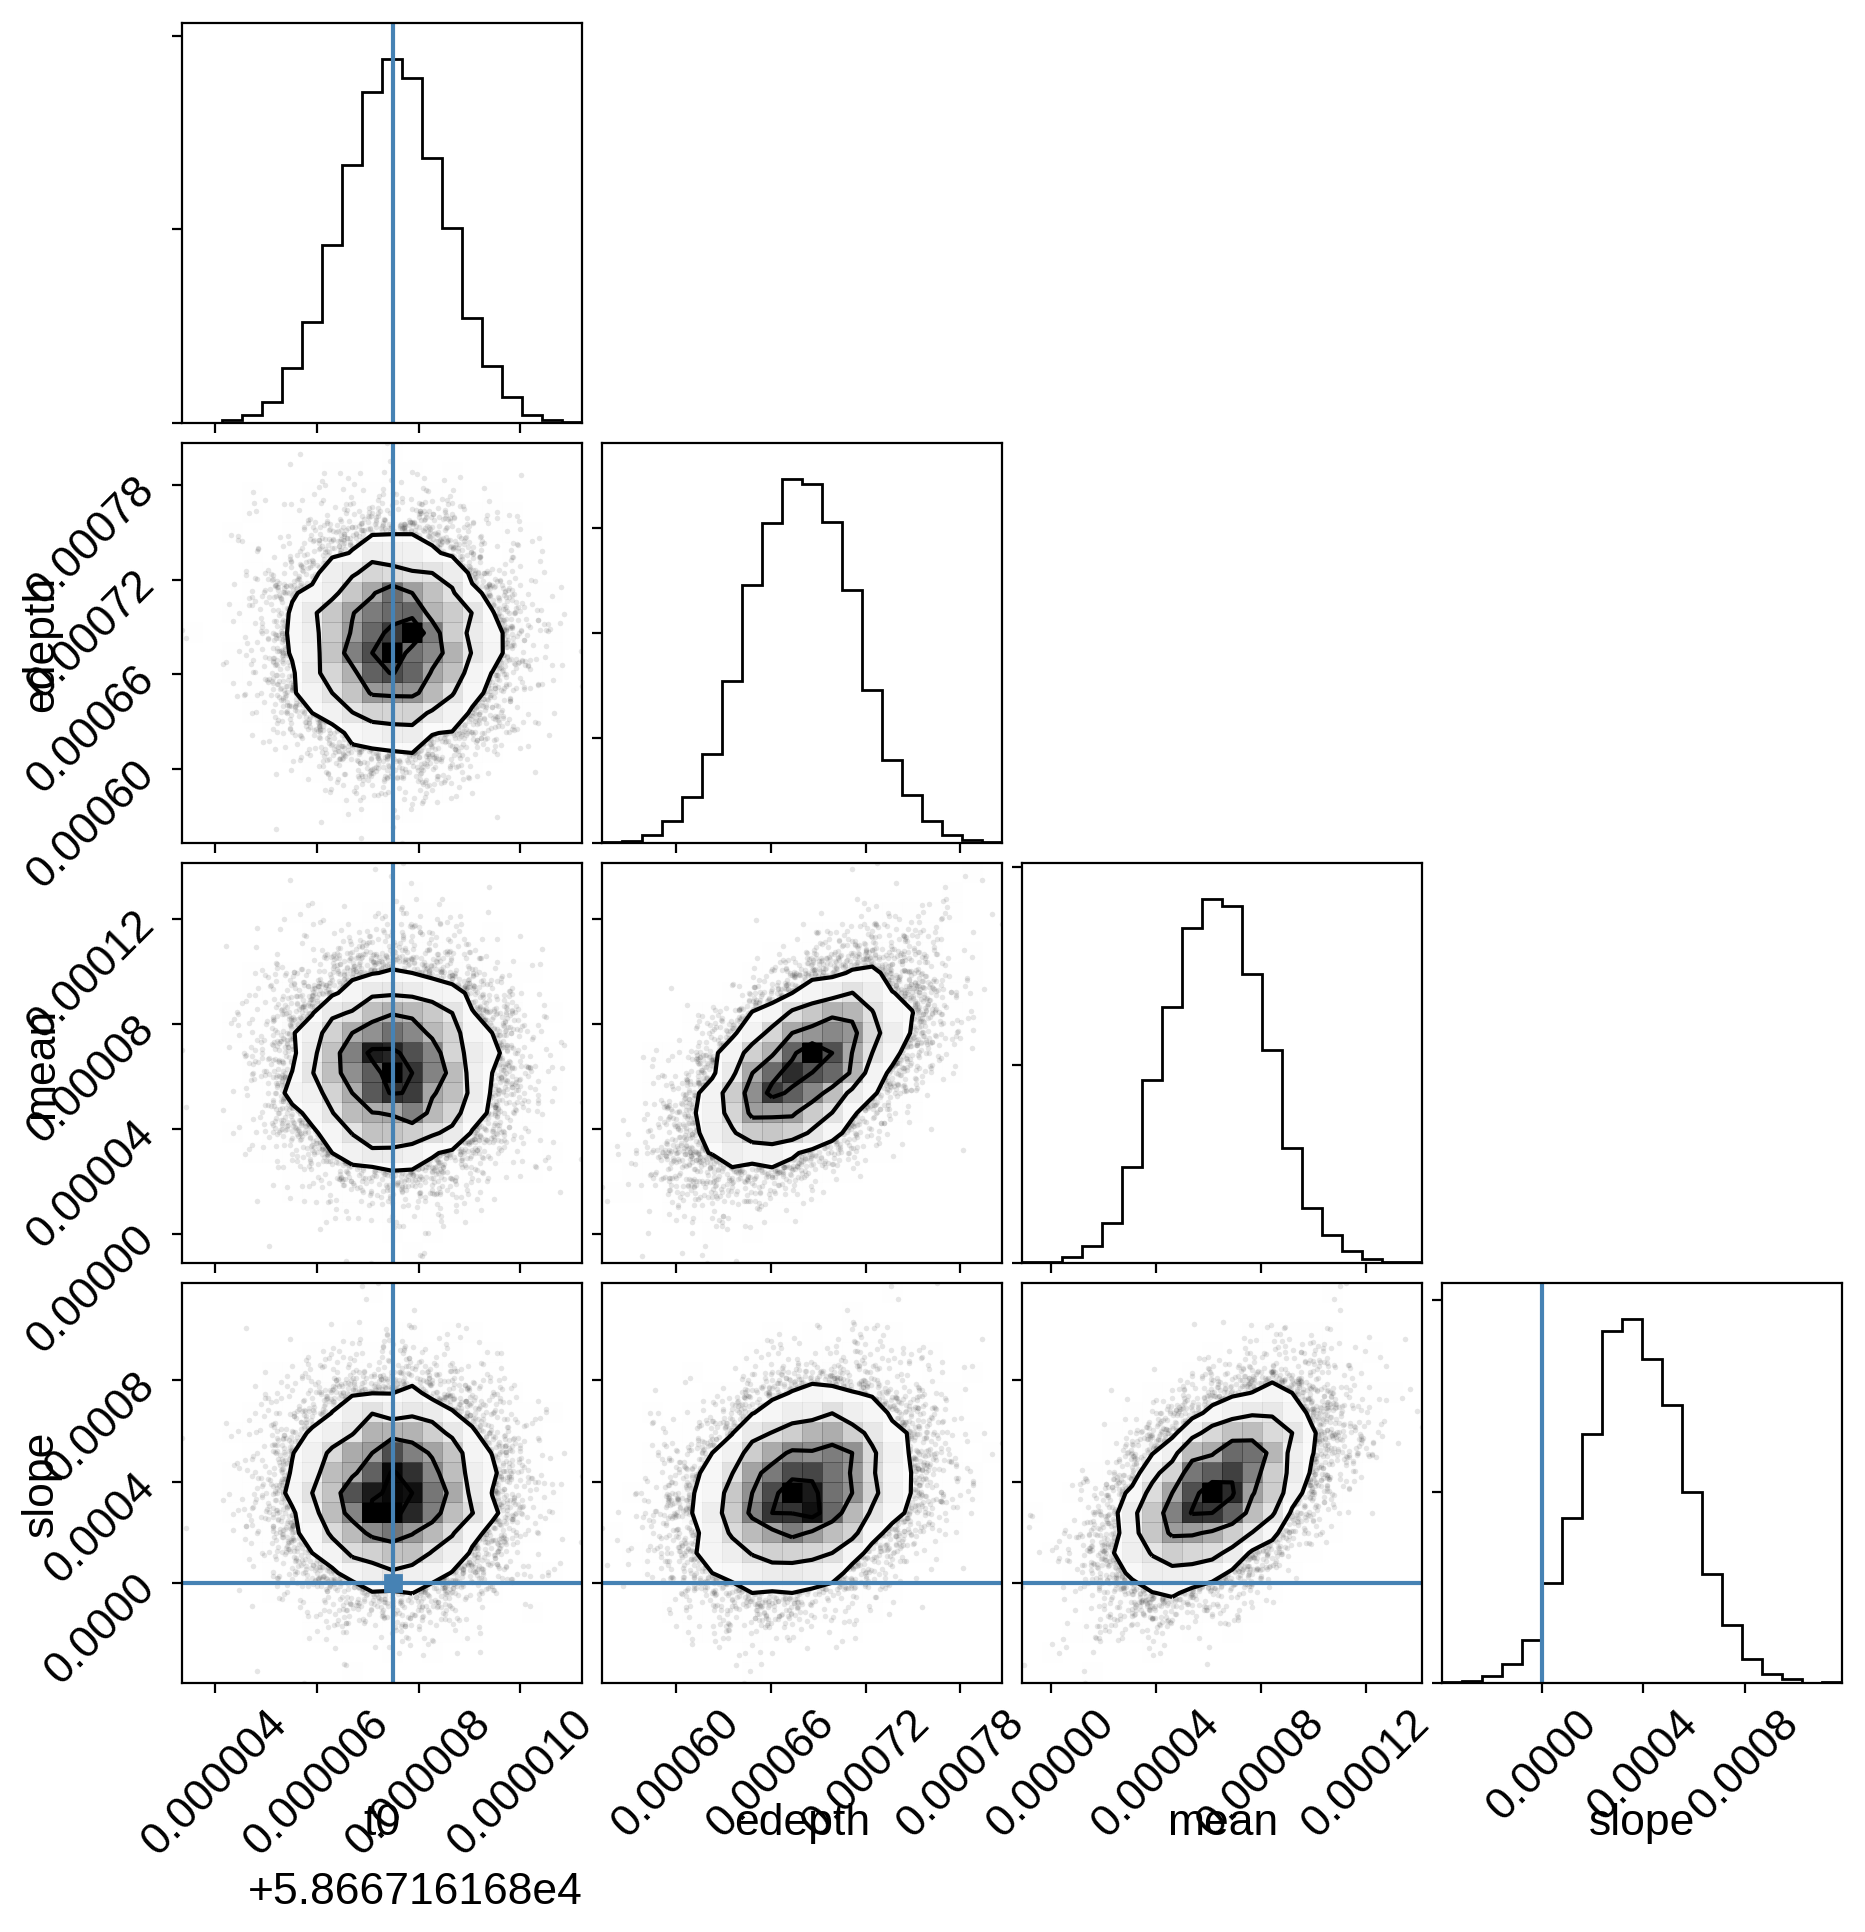

In [0]:
import corner

samples = pm.trace_to_dataframe(trace, varnames=["t0", "edepth", "mean", "slope"])
truth = [t0_guess, 0.0, 1.0, 0.0]
corner.corner(samples, truths=truth, labels=["t0", "edepth", "mean", "slope"]);

## Phase plots

Like in the radial velocity tutorial (:ref:`rv`), we can make plots of the model predictions for each planet.

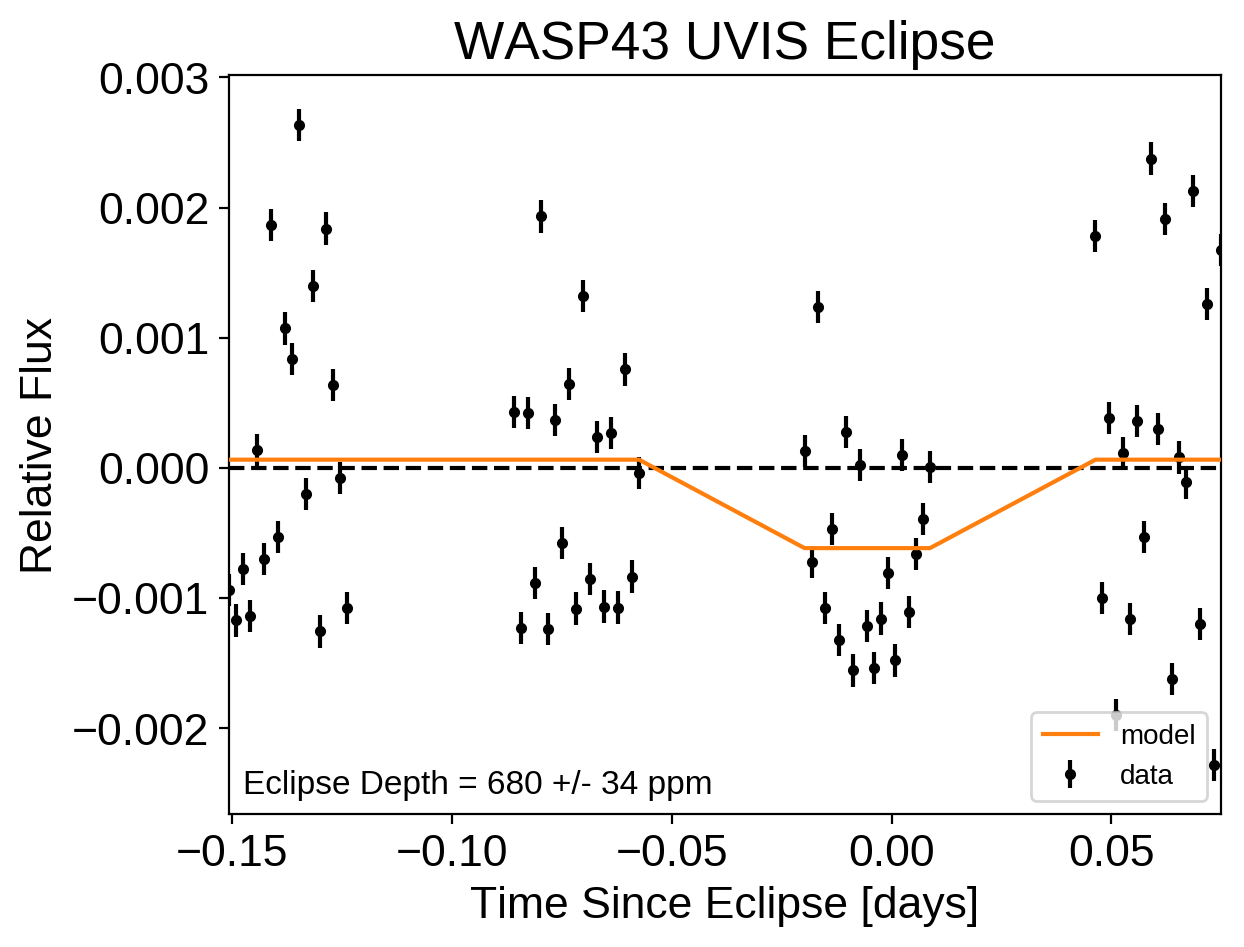

In [0]:
plt.figure()

# Get the posterior median orbital parameters
p = period
t0 = np.median(trace["t0"])

# Plot the folded data
plt.errorbar(t - t0, data, yerr=yerr, fmt=".k", label="data", zorder=-1000)

# Plot the folded model
preds = trace["light_curves"][:,:,0] + trace["mean"][:, None]
pred = np.median(preds, axis=0)
# pred -= pred.min()
plt.plot(t - t0, pred, color="C1", label="model", zorder=10)
plt.axhline(0.0, ls='--', color='k')

# Annotate the plot with the planet's period
txt = f"Eclipse Depth = {np.mean(trace['edepth']*1e6):.0f}"
txt += f" +/- {np.std(trace['edepth']*1e6):.0f} ppm"

plt.annotate(
    txt,
    (0, 0),
    xycoords="axes fraction",
    xytext=(5, 5),
    textcoords="offset points",
    ha="left",
    va="bottom",
    fontsize=12,
)

add_traces = False
if add_traces:
  n_traces = 1000
  idx_rand = np.random.choice(np.arange(preds.shape[0]), size=n_traces, replace=False)
  for pred_ in preds[idx_rand]:
      plt.plot(t - t0, pred, color="grey", alpha=0.5, zorder=0)

plt.legend(fontsize=10, loc=4)
plt.xlim((t - t0).min(), (t - t0).max())
plt.xlabel("Time Since Eclipse [days]")
plt.ylabel("Relative Flux")
plt.title("WASP43 UVIS Eclipse");

## Citations

As described in the :ref:`citation` tutorial, we can use :func:`exoplanet.citations.get_citations_for_model` to construct an acknowledgement and BibTeX listing that includes the relevant citations for this model.
This is especially important here because we have used quite a few model components that should be cited.

In [0]:
with model:
    txt, bib = xo.citations.get_citations_for_model()
print(txt)

This research made use of \textsf{exoplanet} \citep{exoplanet} and its
dependencies \citep{exoplanet:agol19, exoplanet:astropy13, exoplanet:astropy18,
exoplanet:exoplanet, exoplanet:luger18, exoplanet:pymc3, exoplanet:theano}.


In [0]:
print("\n".join(bib.splitlines()[:10]) + "\n...")


@misc{exoplanet:exoplanet,
  author = {Daniel Foreman-Mackey and Ian Czekala and Rodrigo Luger and
            Eric Agol and Geert Barentsen and Tom Barclay},
   title = {dfm/exoplanet},
   month = sep,
    year = 2019,
     doi = {10.5281/zenodo.1998447},
     url = {https://doi.org/10.5281/zenodo.1998447}
}
...
